# Лабораторная работа №3
## Выполнила: Пилипенко Елизавета
## Группа: ИДБ-22-13
## Часть 1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Загрузка данных
data = pd.read_csv("wifi_localization.txt", sep="\t", header=None)

# Название столбцов
columns = ["WiFi-Network-1", "WiFi-Network-2", "WiFi-Network-3", "WiFi-Network-4", 
           "WiFi-Network-5", "WiFi-Network-6", "WiFi-Network-7", "Room"]

# Переименование столбцов
data.columns = columns

# Разделение данных на обучающую и тестовую выборки
X = data.drop("Room", axis=1)
y = data["Room"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_logreg = logreg.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_logreg))

Логистическая регрессия:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       104
           2       0.98      0.93      0.95        95
           3       0.91      0.98      0.95        88
           4       0.99      1.00      1.00       113

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [47]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_dtree = dtree.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("Дерево решений:")
print(classification_report(y_test, y_pred_dtree))

Дерево решений:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       104
           2       0.99      0.95      0.97        95
           3       0.95      0.98      0.96        88
           4       1.00      0.99      1.00       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_knn = knn.predict(X_test)

# Вывод Classification Report и Confusion Matrix
print("K-ближайших соседей:")
print(classification_report(y_test, y_pred_knn))

K-ближайших соседей:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       104
           2       0.98      0.94      0.96        95
           3       0.91      0.98      0.95        88
           4       1.00      0.98      0.99       113

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [ ]:
# Обучаем K-means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_train)

# Предсказание на тестовых данных
y_pred_kmeans = kmeans.predict(X_test)

# Переиндексируем кластеры K-means
def reindex_clusters(y_true, y_pred):
    mapping = {}
    for i in np.unique(y_pred):
        # Находим наиболее частую истинную метку для текущего кластера
        mode = y_true[y_pred == i].mode()[0]
        mapping[i] = mode
    return np.array([mapping[label] for label in y_pred])

# Переиндексация предсказанных кластеров
y_pred_kmeans_reindexed = reindex_clusters(y_test, pd.Series(y_pred_kmeans, index=y_test.index))

# Вывод результатов
print("K-means после переиндексации кластеров:")
print(classification_report(y_test, y_pred_kmeans_reindexed))

K-means после переиндексации кластеров:
              precision    recall  f1-score   support

           1       0.96      0.85      0.90       104
           2       1.00      0.84      0.91        95
           3       0.73      0.95      0.83        88
           4       0.98      0.98      0.98       113

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.92      0.91      0.91       400



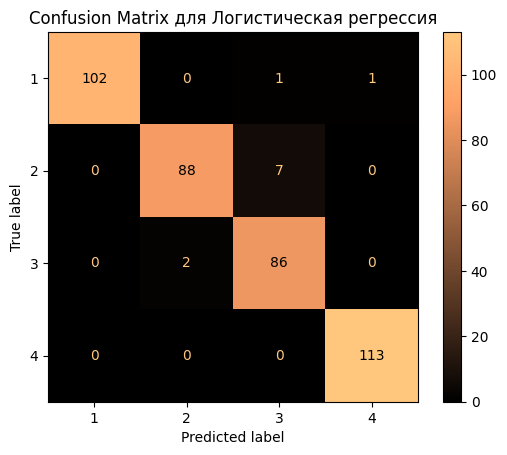

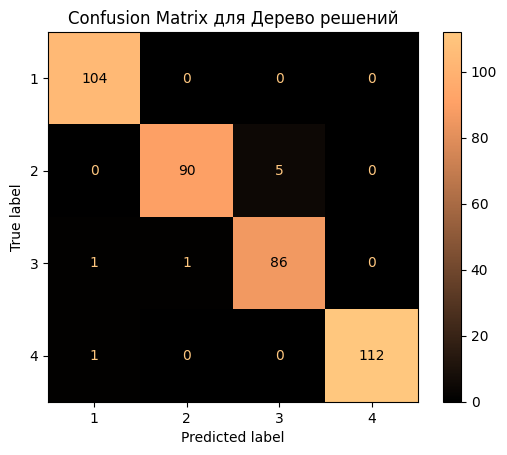

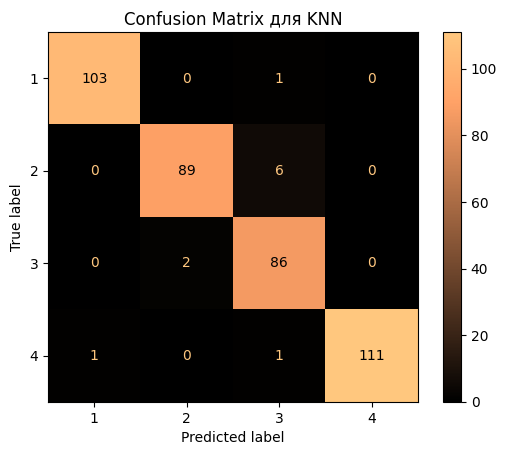

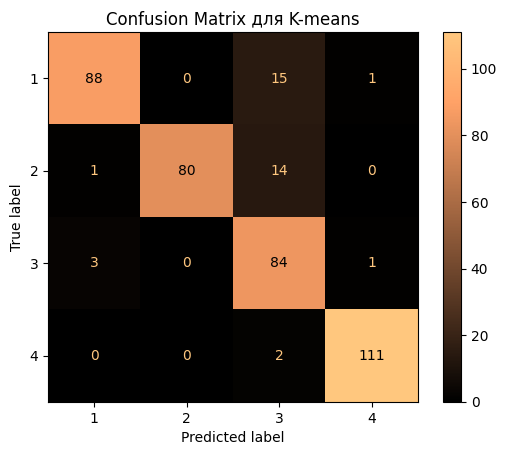

In [55]:
for model_name, y_pred in [("Логистическая регрессия", y_pred_logreg), 
                           ("Дерево решений", y_pred_dtree), 
                           ("KNN", y_pred_knn),
                           ("K-means", y_pred_kmeans_reindexed)]:
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    disp.plot(cmap='copper')
    plt.title(f"Confusion Matrix для {model_name}")
    plt.show()


In [67]:
# Подсчёт общего количества ошибок для каждой модели
logreg_errors = (y_test != y_pred_logreg).sum()
dtree_errors = (y_test != y_pred_dtree).sum()
knn_errors = (y_test != y_pred_knn).sum()
kmeans_errors = (y_test != y_pred_kmeans_reindexed).sum()

print(f"Общее количество ошибок для Логистической регрессии: {logreg_errors}")
print(f"Общее количество ошибок для Дерева решений: {dtree_errors}")
print(f"Общее количество ошибок для K-ближайших соседей: {knn_errors}")
print(f"Общее количество ошибок для K-means: {kmeans_errors}")

# Подсчёт количества ошибок по каждой комнате
logreg_room_errors = y_test[y_test != pd.Series(y_pred_logreg, index=y_test.index)].value_counts()
dtree_room_errors = y_test[y_test != pd.Series(y_pred_dtree, index=y_test.index)].value_counts()
knn_room_errors = y_test[y_test != pd.Series(y_pred_knn, index=y_test.index)].value_counts()
kmeans_room_errors = y_test[y_test != pd.Series(y_pred_kmeans_reindexed, index=y_test.index)].value_counts()

# Объединение данных в общую таблицу
total_room_errors = pd.DataFrame({
    "Логистическая регрессия": logreg_room_errors,
    "Дерево решений": dtree_room_errors,
    "K-ближайших соседей": knn_room_errors,
    "K-means": kmeans_room_errors
}).fillna(0).astype(int)

# Сумма ошибок по комнатам
total_room_errors["Сумма ошибок"] = total_room_errors.sum(axis=1)

# Вывод ошибок по каждой комнате
print("\nОшибки по комнатам для всех моделей:")
print(total_room_errors)

# Комнаты с минимальными и максимальными ошибками
min_error_room = total_room_errors["Сумма ошибок"].idxmin()
max_error_room = total_room_errors["Сумма ошибок"].idxmax()

print(f"\nКомната с наименьшим количеством ошибок: {min_error_room}")
print(f"Количество ошибок: {total_room_errors.loc[min_error_room, 'Сумма ошибок']}")

print(f"\nКомната с наибольшим количеством ошибок: {max_error_room}")
print(f"Количество ошибок: {total_room_errors.loc[max_error_room, 'Сумма ошибок']}")


Общее количество ошибок для Логистической регрессии: 11
Общее количество ошибок для Дерева решений: 8
Общее количество ошибок для K-ближайших соседей: 11
Общее количество ошибок для K-means: 37

Ошибки по комнатам для всех моделей:
      Логистическая регрессия  Дерево решений  K-ближайших соседей  K-means  \
Room                                                                          
1                           2               0                    1       16   
2                           7               5                    6       15   
3                           2               2                    2        4   
4                           0               1                    2        2   

      Сумма ошибок  
Room                
1               19  
2               33  
3               10  
4                5  

Комната с наименьшим количеством ошибок: 4
Количество ошибок: 5

Комната с наибольшим количеством ошибок: 2
Количество ошибок: 33


### Анализ результатов K-means

**Общие ошибки:**
- Всего: 37 ошибок.
- Распределение по комнатам:
  - Комната 1: 16 ошибок.
  - Комната 2: 15 ошибок.
  - Комната 3: 4 ошибки.
  - Комната 4: 2 ошибки.

**Основные ошибки** возникают между комнатами 1 и 3, а также между комнатами 2 и 3:
   - Это может быть связано с схожестью признаков у этих комнат.
   - Возможно, K-means плохо справляется с разделением, если границы между классами не являются четкими или линейными.

**Сравнение с моделями с учителем:**
   - K-means имеет больше ошибок по сравнению с методами обучения с учителем. Это ожидаемо, так как K-means работает без использования меток классов и менее точно разделяет данные.
   - Комната 2 является проблемной для всех моделей, включая K-means. У K-means 15 ошибок против 7-6 ошибок у методов с учителем.
   - Комната 1 показывает значительные ошибки у K-means (16 ошибок), в то время как методы обучения с учителем справляются гораздо лучше (максимум 2 ошибки).
   - Комната 3 имеет стабильное количество ошибок для всех моделей.
   - Комната 4 лучше классифицируется деревом решений и логистической регрессией, но у K-means возникают небольшие проблемы.
   - Методы обучения с учителем показывают лучшую точность и F1-меру по сравнению с K-means.

**Вывод о взаимозаменяемости:**
   - K-means показывает достойные результаты, но уступает методам обучения с учителем по точности и количеству ошибок.
   - K-means может быть полезен для предварительной кластеризации или анализа данных без меток, но для задач классификации предпочтительнее использовать методы с учителем.
   
   *Причины расхождений включают:*
      Наличие схожих признаков у разных классов, 
      ограниченность K-means в улавливании сложных зависимостей, 
      методы обучения с учителем оказываются более эффективными для данной задачи, поскольку они используют метки классов для оптимизации предсказаний.

Таким образом, K-means не является взаимозаменяемым с моделями обучения с учителем для данной задачи.

## Часть 2

In [71]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Загрузка данных из папки
def load_data_from_folder(base_folder):
    data = []
    for sub_folder in ['Src', 'Tokenized']:
        folder_path = os.path.join(base_folder, sub_folder)
        for language_folder in os.listdir(folder_path):
            language_path = os.path.join(folder_path, language_folder)
            if os.path.isdir(language_path):
                for file_name in os.listdir(language_path):
                    file_path = os.path.join(language_path, file_name)
                    if os.path.isfile(file_path):
                        try:
                            with open(file_path, 'r', encoding='utf-8') as f:
                                code = f.read()
                                data.append({'code': code, 'language': language_folder})
                        except Exception as e:
                            print(f"Ошибка чтения файла {file_path}: {e}")
    return pd.DataFrame(data)

base_folder = 'rosetta'
data = load_data_from_folder(base_folder)

print(f"Загружено {len(data)} записей.")
print(data.head())

data = load_data_from_folder(base_folder)

# Векторизация с помощью TF-IDF
def vectorize_data(data):
    vectorizer = TfidfVectorizer(max_features=1000)  # Ограничим число признаков для эффективности
    X = vectorizer.fit_transform(data['code'])
    return X, vectorizer

X, vectorizer = vectorize_data(data)
print(f"Размер матрицы признаков: {X.shape}")

Загружено 46352 записей.
                                                code language
0  with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...      Ada
1  with Ada.Text_Io; use Ada.Text_Io;\n with Ada....      Ada
2  with Ada.Text_IO;\nwith Ada.Numerics.Discrete_...      Ada
3  with Ada.Text_Io; use Ada.Text_Io;\n\n procedu...      Ada
4  with Ada.Text_Io; use Ada.Text_Io;\n\nprocedur...      Ada
Размер матрицы признаков: (46352, 1000)


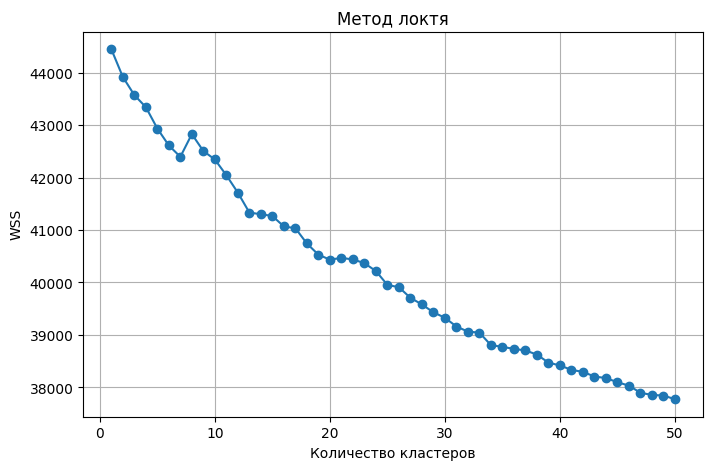

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_optimal_clusters_elbow(X, max_k=50):
    distortions = []
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        distortions.append(model.inertia_)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Количество кластеров')
    plt.ylabel('WSS')
    plt.title('Метод локтя')
    plt.grid(True)
    plt.show()

# Вызов функции для определения количества кластеров
find_optimal_clusters_elbow(X, max_k=50)


In [74]:
n_clusters = 8 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

data['cluster'] = kmeans.labels_
print(data[['language', 'cluster']])


           language  cluster
0               Ada        7
1               Ada        7
2               Ada        7
3               Ada        7
4               Ada        7
...             ...      ...
46347  X86-Assembly        7
46348  X86-Assembly        7
46349  X86-Assembly        7
46350  X86-Assembly        7
46351  X86-Assembly        7

[46352 rows x 2 columns]


     cluster      language  count
0          0           Ada      6
1          0             C      6
2          0       Clojure      2
3          0   Common-Lisp     14
4          0             D     14
..       ...           ...    ...
147        7          Rust    450
148        7         Scala   1426
149        7        Scheme    794
150        7         Swift    418
151        7  X86-Assembly    188

[152 rows x 3 columns]


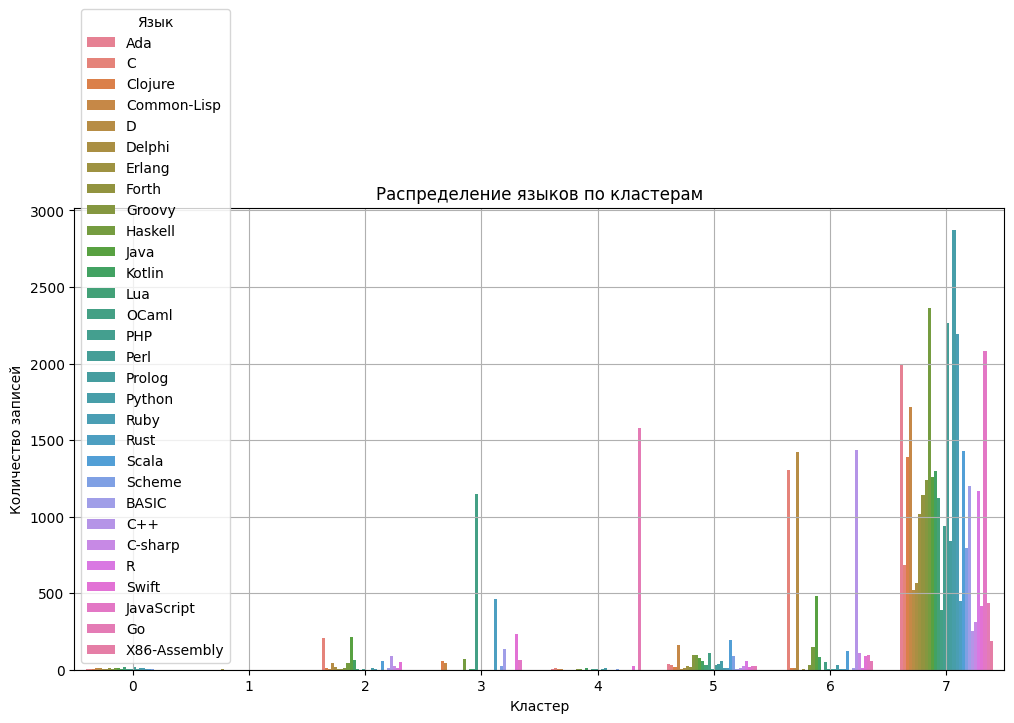

In [75]:
# Группируем данные по кластеру и языку, подсчитывая количество записей
cluster_language_distribution = data.groupby(['cluster', 'language']).size().reset_index(name='count')

# Выводим результаты
print(cluster_language_distribution)

# Визуализация распределения языков по кластерам
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_language_distribution, x='cluster', y='count', hue='language')
plt.title('Распределение языков по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество записей')
plt.legend(title='Язык')
plt.grid(True)
plt.show()


In [78]:
import numpy as np

def get_top_keywords(data, vectorizer, n_clusters, n_terms=10):
    # Получаем термы (слова) из TF-IDF векторизатора
    terms = vectorizer.get_feature_names_out()
    
    for i in range(n_clusters):
        # Извлекаем записи для текущего кластера
        cluster_data = data[data['cluster'] == i]
        # Получаем TF-IDF матрицу для этих записей
        cluster_tfidf = X[cluster_data.index]
        # Суммируем TF-IDF значения по каждому слову
        word_scores = np.asarray(cluster_tfidf.sum(axis=0)).flatten()
        # Сортируем слова по убыванию TF-IDF
        top_terms = [terms[index] for index in word_scores.argsort()[-n_terms:][::-1]]
        
        print(f"\nТоп {n_terms} слов для кластера {i}:")
        print(", ".join(top_terms))

# Вызов функции для анализа ключевых слов
get_top_keywords(data, vectorizer, n_clusters, n_terms=10)



Топ 10 слов для кластера 0:
socket, client, port, world, hello, 256, close, import, write, net

Топ 10 слов для кластера 1:
count, pattern, acc, p1, p2, is, list, format, io, end

Топ 10 слов для кластера 2:
double, int, return, public, math, include, static, val, for, sum

Топ 10 слов для кластера 3:
let, in, mut, printf, fn, if, then, rec, println, string

Топ 10 слов для кластера 4:
fmt, func, err, println, main, package, float64, for, int, return

Топ 10 слов для кластера 5:
list, def, int, val, map, string, data, if, for, the

Топ 10 слов для кластера 6:
int, std, include, return, void, if, main, stdio, cout, const

Топ 10 слов для кластера 7:
end, print, if, for, string, return, is, def, the, function


На графике видно, что языки распределены по кластерам неравномерно. Большинство данных сосредоточено в кластерах 6 и 7, тогда как некоторые кластеры содержат гораздо меньше записей. Это указывает на то, что большинство исходного кода имеет определённые схожие признаки, которые влияют на разбиение.

Кластеры разделились по типам языков и их синтаксическим особенностям:

- Статически типизированные языки (C, C++, Java) сгруппировались в кластерах 2 и 6.
- Скриптовые и динамические языки (Python, Ruby, JavaScript) преобладают в кластерах 5 и 7.
- Функциональные языки (Haskell, Lisp, Scala) заметны в кластерах 1 и 3.
- Сетевое программирование попало в кластер 0.
